# Limits of the Heisenberg model

In [6]:
using LinearAlgebra, SparseArrays, DelimitedFiles, Arpack, Plots

#Including the functions to construct a Hamiltonian and calculate the entanglement entropy
include("functions.jl") #MakeHam, RedDens, EntEntr, PopMul, BinDec

In [91]:
function FindGS(eigsys)
    min=minimum(eigsys.values)
    gsts=findall(x->x==min,eigsys.values)
    degcy = length(gsts)
    evcs=Array{Float64}(undef, 2^N,degcy)
    for i in 1:degcy
        evcs[:,i] = eigsys.vectors[:,gsts[i]]
    end
    evcs
end

FindGS (generic function with 1 method)

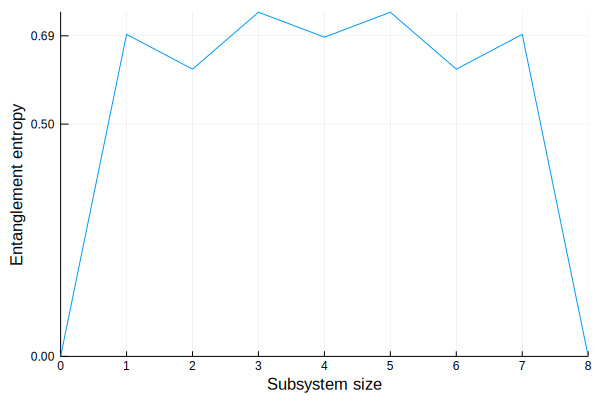

In [198]:
function PlotHeis(Jxy,Jz,N)
    jmat = zeros(Float64, N, N, 3);
    for a in 1:3
        if a==3
            J=Jz
        else
            J=Jxy
        end

        for i in 1:Int(N-1)
            jmat[i,i+1,a]=jmat[i+1,i,a]=J
        end
    end
    ham = Matrix(MakeHam(jmat))
    eigsys = eigen(ham)
    gs=FindGS(eigsys)
    vals = Array{Float64}(undef, N+1)
    for i in 0:N
        vals[i+1]=EntEntr(gs,collect(1:i))
    end
    plot(0:N,vals,
        ylims=(0,1.07log(2)), xlims=(0,N), 
        xlabel="Subsystem size", ylabel="Entanglement entropy", label="", xticks = 0:1:N, yticks = [0,0.5,0.69])
end
PlotHeis(1,1,8)

In [211]:
Jz = Jxy = 1
jmat = zeros(Float64, N, N, 3);
for a in 1:3
    if a==3
        J=Jz
    else
        J=Jxy
    end

    for i in 1:Int(N-1)
        jmat[i,i+1,a]=jmat[i+1,i,a]=J
    end
end
ham = Matrix(MakeHam(jmat))
eigsys = eigen(ham)
gs=FindGS(eigsys)
EntEntr(gs,[2,4,6,8])

1.5312869412387005

## Ising model

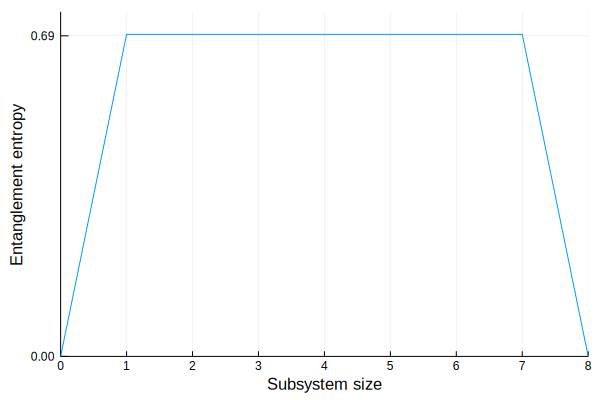

In [192]:
N=8
Jz=1
Jxy=0
jmat = zeros(Float64, N, N, 3);
for a in 1:3
    if a==3
        J=Jz
    else
        J=Jxy
    end
        
    for i in 1:Int(N-1)
        jmat[i,i+1,a]=jmat[i+1,i,a]=J
    end
end
ham = Matrix(MakeHam(jmat))
eigsys = eigen(ham)
gs=FindGS(eigsys)
vals = Array{Float64}(undef, N+1)
for i in 0:N
    vals[i+1]=EntEntr(1/sqrt(2)*(gs[:,1]+gs[:,2]),collect(1:i))
end
plot(0:N,vals,
    ylims=(0,1.07log(2)), xlims=(0,N), 
    xlabel="Subsystem size", ylabel="Entanglement entropy", label="", xticks = 0:1:N, yticks = 0:0.69:1)